Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **25 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Tuan"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Deterministic Quicksort

## Question 1 [time estimate: 5 minutes]

Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

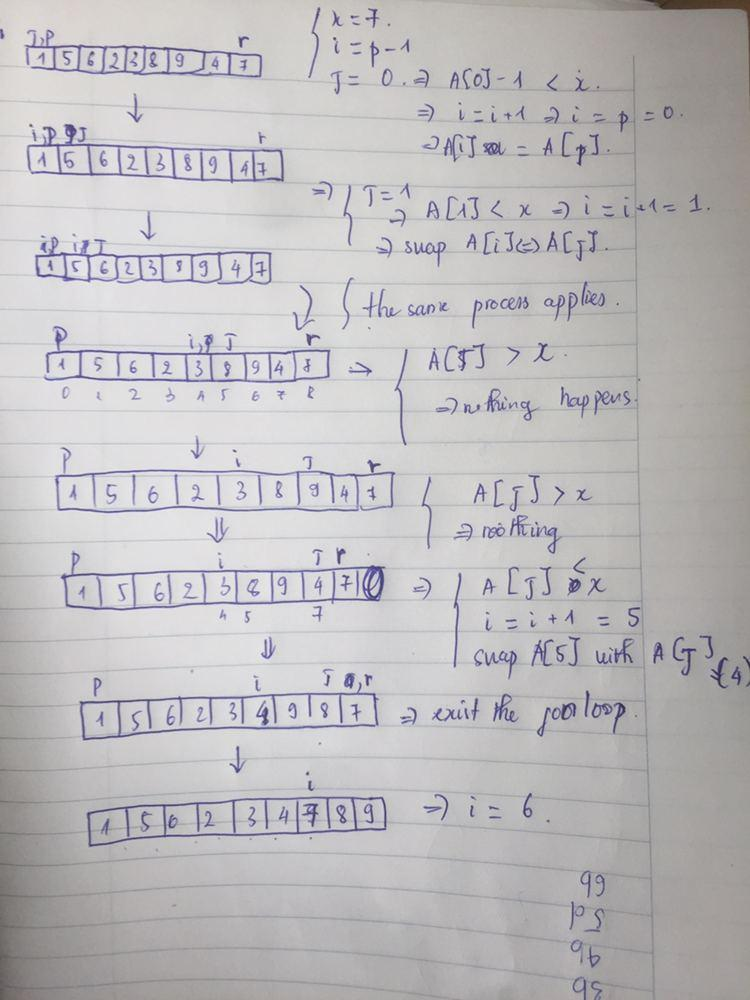

The value of i would be the same as the value of pivot number.

## Question 2 [time estimate: 7 minutes]

Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [3]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    x = A[r]
    i = p-1
    for j in range(p,r):
           if A[j]<= A[r]:
                i=i+1
                A[i],A[j]=A[j],A[i]
    A[i+1],A[r] = A[r],A[i+1]
    return i+1
            

In [4]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3 [time estimate: 3 minutes]

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [9]:
def quick_sort(A,p,r):
    if p<r:
        q = partition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)
    return A


In [10]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4 [time estimate: 10 minutes] 

Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


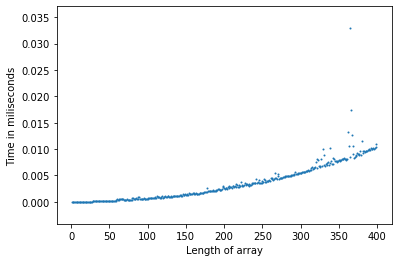

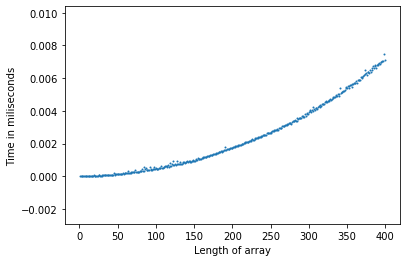

In [15]:
import time
import matplotlib.pyplot as plt
def visualize_algo_normal(sorting_algorithm):
    x = []
    y = []
    for i in range(1,400):
        list_x = [1 for k in range(i,0,-1)]
        x.append(i)
        time_start = time.perf_counter()
        sorting_algorithm(list_x,0,len(list_x)-1)
        time_end = time.perf_counter() - time_start
        y.append(time_end)
    plt.scatter(x,y,s=1)
    plt.ylabel("Time in miliseconds")
    plt.xlabel("Length of array")
    plt.show()
visualize_algo(quick_sort)

def visualize_algo_descending_order(sorting_algorithm):
    x=[]
    y=[]
    for i in range(1,400): 
        list_x= [k for k in range(i,0,-1)]
        x.append(i)
        time_start = time.perf_counter()
        sorting_algorithm(list_x,0,len(list_x)-1)
        time_end = time.perf_counter() - time_start
        y.append(time_end)
    plt.scatter(x,y,s=1)
    plt.ylabel("Time in miliseconds")
    plt.xlabel("Length of array")
    plt.show()
visualize_algo_descending_order(quick_sort)

Running of both algorithm is ${O(n^2)}$ because at both case, the pivot number can not seperate the array into balanced array. So, the remaining problem after each partition only decreased by n-1. Suppose the array has N-length, which based on the pivot number, the array can be divided into N1 and N2, in which N1+N2 = N. The time complexity for both algorithm is T(N1)+T(N2). In case the pivot number split the array disproportionally, which the worst case is N1 = N-1 and N2 = 0. By recursion, the N1 would be divided into N-2 and 0 again. Each time likes that takes cn+ c(n-1)+ c(n-2)+....+ 1. Therefore, the time for both is n*(n-1)/2, which is ${O(n^2)}$.
Another explaination can be:
- for the first scenario, the pivot number is same as other numbers, so 